In [1]:
# 导包
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_path = "./"

In [3]:
print(os.listdir(train_path))

['.ipynb_checkpoints', '0-6.csv', '7-9.csv', 'data', 'graphviz.ipynb', 'GRU.h5', 'GRU0712.h5', 'GRU071236-15.h5', 'GRU071236-15原始.h5', 'GRU=数据0在第一位-修改0712.ipynb', 'GRU=数据0在第一位.ipynb', 'GRU=数据1在第一位.ipynb', 'GRU=数据2在第一位.ipynb', 'GRU=数据3在第一位.ipynb', 'GRU=数据4在第一位.ipynb', 'GRU=数据5在第一位.ipynb', 'GRU=数据6在第一位.ipynb', 'GRU=数据7在第一位.ipynb', 'GRU=数据8在第一位 -64-0712最新修改.ipynb', 'GRU=数据8在第一位.ipynb', 'GRU=数据9在第一位 - 修改0712.ipynb', 'GRU=数据9在第一位.ipynb', 'LSTM=数据9在第一位 64-0712最新修改.ipynb', 'MLP=数据9在第一位 64-0712最新修改.ipynb', 'model.h5', 'modelnew.h5', 'SMOTE.ipynb', 'Untitled.ipynb', '数据合并.ipynb', '数据拆分.ipynb', '模型保存']


In [4]:
# 读取文件


#dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')


data = pd.read_csv('./data/SMOTE数据拆分7699数据扩充数据合并/0在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分7699/0-8.csv')
data

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,155,1.0,29,2190,190070400,16.0,0,50,28,24.5,...,1,64,0,201.4,3145920,-0.20,-1.03,0,0,0
1,158,1.0,29,2190,190073400,19.0,0,50,28,24.4,...,1,64,0,198.7,3145920,0.16,-0.21,0,0,0
2,163,1.0,29,2190,190078400,24.0,0,50,28,24.1,...,1,64,0,197.3,3145920,0.83,0.41,0,0,0
3,167,1.0,29,2190,190082400,28.0,0,50,28,24.0,...,1,64,0,200.3,3145920,0.42,1.11,0,0,0
4,173,1.0,29,2190,190088400,34.0,0,50,28,24.2,...,1,64,0,202.4,3145920,-1.19,1.13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12445,89,1.0,29,2190,190004400,6503.6,0,50,28,24.3,...,1,64,0,201.3,3145920,-0.30,1.10,0,0,0
12446,111,1.0,29,2190,190026400,6525.6,0,50,28,24.5,...,1,64,0,202.8,3145920,-0.47,0.30,0,0,0
12447,115,1.0,29,2190,190030400,6529.6,0,50,28,24.5,...,1,64,0,200.2,3145920,-0.42,-1.37,0,0,0
12448,124,1.0,29,2190,190039400,6538.6,0,50,28,24.1,...,1,64,0,199.9,3145920,1.06,0.75,0,0,0


In [5]:
# 查看前5行数据
data.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,155,1.0,29,2190,190070400,16.0,0,50,28,24.5,...,1,64,0,201.4,3145920,-0.20,-1.03,0,0,0
1,158,1.0,29,2190,190073400,19.0,0,50,28,24.4,...,1,64,0,198.7,3145920,0.16,-0.21,0,0,0
2,163,1.0,29,2190,190078400,24.0,0,50,28,24.1,...,1,64,0,197.3,3145920,0.83,0.41,0,0,0
3,167,1.0,29,2190,190082400,28.0,0,50,28,24.0,...,1,64,0,200.3,3145920,0.42,1.11,0,0,0
4,173,1.0,29,2190,190088400,34.0,0,50,28,24.2,...,1,64,0,202.4,3145920,-1.19,1.13,0,0,0


In [6]:
data.index

RangeIndex(start=0, stop=12450, step=1)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12450 entries, 0 to 12449
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count           12450 non-null  int64  
 1   gpsPdop         12450 non-null  float64
 2   gpsNumSv        12450 non-null  int64  
 3   gpsWeek         12450 non-null  int64  
 4   itow            12450 non-null  int64  
 5   gpsSec          12450 non-null  float64
 6   P_Sol_Status    12450 non-null  int64  
 7   Pos_Type        12450 non-null  int64  
 8   AvionicsTemp    12450 non-null  int64  
 9   MainPowerV      12450 non-null  float64
 10  ServPowerV      12450 non-null  float64
 11  powerV          12450 non-null  float64
 12  APGlobalStatus  12450 non-null  int64  
 13  GPSStatus       12450 non-null  int64  
 14  mpStatus        12450 non-null  int64  
 15  cmd             12450 non-null  int64  
 16  Lat             12450 non-null  float64
 17  Lon             12450 non-null 

In [8]:
## 去除缺失数据
#A = data.dropna(axis=0, how='any', inplace=True)

In [9]:
print(data)

       count  gpsPdop  gpsNumSv  gpsWeek       itow  gpsSec  P_Sol_Status  \
0        155      1.0        29     2190  190070400    16.0             0   
1        158      1.0        29     2190  190073400    19.0             0   
2        163      1.0        29     2190  190078400    24.0             0   
3        167      1.0        29     2190  190082400    28.0             0   
4        173      1.0        29     2190  190088400    34.0             0   
...      ...      ...       ...      ...        ...     ...           ...   
12445     89      1.0        29     2190  190004400  6503.6             0   
12446    111      1.0        29     2190  190026400  6525.6             0   
12447    115      1.0        29     2190  190030400  6529.6             0   
12448    124      1.0        29     2190  190039400  6538.6             0   
12449    127      1.0        29     2190  190042400  6541.6             0   

       Pos_Type  AvionicsTemp  MainPowerV  ...  rcState  Failure_ad  leftRP

C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jammer')

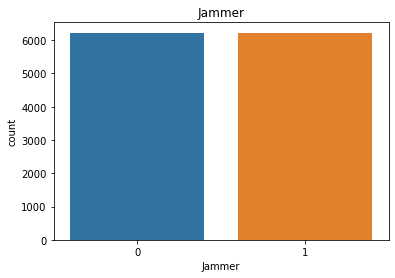

In [10]:
# 样本分布
# 以图方式表示
sns.countplot(data["Jammer"])
plt.xlabel("Jammer")
plt.title("Jammer")

In [11]:
# 重新排序
# df = data.sample(frac=1).reset_index(drop=True)

In [12]:
#A = data

In [13]:
# 数据清洗
A = data.loc[:, (data != 0).any(axis=0)]#删除数据全部为0的列
del A['count']
del A['gpsWeek']
del A['itow']
del A['Pos_Type']
del A['MainPowerV']
del A['ServPowerV']
del A['powerV']
del A['APGlobalStatus']
del A['GPSStatus']
del A['cmd']
del A['StaticP']
del A['throttleCmd']
del A['latCmd']
del A['pedCmd']
del A['throtCmd']
del A['Aileron']
del A['Elevator']
del A['Throttle']
del A['Rudder']
#del A['photoNum']
#del A['rcState']
del A['mpStatus']
del A['Action']
del A['rcState']
del A['Failure_ad']
del A['Failure']
data = A
print(data)

       gpsPdop  gpsNumSv  gpsSec  P_Sol_Status  AvionicsTemp        Lat  \
0          1.0        29    16.0             0            28  40.072665   
1          1.0        29    19.0             0            28  40.073147   
2          1.0        29    24.0             0            28  40.074018   
3          1.0        29    28.0             0            28  40.074475   
4          1.0        29    34.0             0            28  40.074373   
...        ...       ...     ...           ...           ...        ...   
12445      1.0        29  6503.6             0            28  40.074581   
12446      1.0        29  6525.6             0            28  40.072310   
12447      1.0        29  6529.6             0            28  40.072662   
12448      1.0        29  6538.6             0            28  40.074134   
12449      1.0        29  6541.6             0            28  40.074472   

              Lon      H    tas      Eu[0]  ...  elevatorCmd  rudderCmd  \
0      116.105566  200.8

In [14]:
df = data

In [15]:
# 空值检查
# df[df.isnull().values==True]

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
## 划分数据集
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [18]:
x_train = x
y_train = y
x_train.shape

(12450, 36)

In [19]:
x_train.head()
#x_train.to_csv('./data/SMOTE数据拆分7699数据扩充数据合并/训练集8在第一位降维.csv',index=False)

,gpsPdop,gpsNumSv,gpsSec,P_Sol_Status,AvionicsTemp,Lat,Lon,H,tas,Eu[0],...,aileronLeftCmd,elevatorCmd,rudderCmd,lonCmd,XaccBias,YaccBias,ZaccBias,AirHeight,WWest,WSouth
0,1.0,29,16.0,0,28,40.072665,116.105566,200.8,20.53,-16.993928,...,2.091296,-2.475178,-1.208941,0.0,0.0,0.0,0.0,201.4,-0.20,-1.03
1,1.0,29,19.0,0,28,40.073147,116.105894,198.4,19.75,-17.246030,...,2.480907,-2.343397,-1.375099,0.0,0.0,0.0,0.0,198.7,0.16,-0.21
2,1.0,29,24.0,0,28,40.074018,116.105703,197.5,19.82,-13.349917,...,2.200158,-1.627200,-1.157375,0.0,0.0,0.0,0.0,197.3,0.83,0.41
3,1.0,29,28.0,0,28,40.074475,116.104992,200.5,19.86,-14.627613,...,2.016811,-1.569904,-1.174563,0.0,0.0,0.0,0.0,200.3,0.42,1.11
4,1.0,29,34.0,0,28,40.074373,116.103599,201.8,20.64,-16.535562,...,1.747521,-1.226130,-1.443854,0.0,0.0,0.0,0.0,202.4,-1.19,1.13


In [20]:
dataset = pd.read_csv('./data/SMOTE数据拆分7699/7.csv')
dataset.shape


(769, 65)

In [21]:
#from sklearn.utils import shuffle  
#data= shuffle(data) 
#data.head()

In [22]:
# 数据清洗

A = dataset.loc[:, (dataset != 0).any(axis=0)]#删除数据全部为0的列

del A['count']
del A['gpsWeek']
del A['itow']
del A['Pos_Type']
del A['MainPowerV']
del A['ServPowerV']
del A['powerV']
del A['APGlobalStatus']
del A['GPSStatus']
del A['cmd']
del A['StaticP']
del A['throttleCmd']
del A['latCmd']
del A['pedCmd']
del A['throtCmd']
del A['Aileron']
del A['Elevator']
del A['Throttle']
##del A['Rudder']
#del A['photoNum']
#del A['rcState']
del A['mpStatus']
del A['Action']
del A['rcState']
del A['Failure_ad']
del A['Failure']


dataset = A

print(dataset)
#dataset.to_csv('./data/SMOTE数据拆分7699数据扩充数据合并/测试集7在第一位降维.csv',index=False)

     gpsPdop  gpsNumSv  gpsSec  P_Sol_Status  AvionicsTemp        Lat  \
0        5.0        16   319.6            13            46  40.136808   
1        1.0        29  6368.6             0            28  40.070992   
2        1.0        31  2095.4             0            30  40.073263   
3        1.0        32  2453.6             0            31  40.072450   
4        5.0        11  5851.8            13            35  40.183089   
..       ...       ...     ...           ...           ...        ...   
764      1.0        31  1826.4             0            30  40.071156   
765      1.0        30  1962.4             0            30  40.071268   
766      1.0        31   805.2             0            22  40.073533   
767      5.0        16   318.6            13            46  40.136784   
768      1.0        31  2159.4             0            30  40.070097   

            Lon      H    tas      Eu[0]  ...  elevatorCmd  rudderCmd  lonCmd  \
0    116.238536  -13.7   3.72  24.465298  

In [23]:
x_test = dataset.iloc[:,:-1]
y_test = dataset.iloc[:,-1]

In [24]:
x_test.shape

(769, 36)

In [25]:
# 数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12450, 36)
(12450,)
(769, 36)
(769,)


In [27]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=36)


#数据的标准化
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)#各个成分方差值
print(sum(var_ratio))#成分方差总和

[[-0.19055696  1.01017945 -1.39144575 ...  1.38819574 -0.34940219
  -0.45694513]
 [-0.19055696  1.01017945 -1.390255   ...  1.35655492 -0.22880317
  -0.20358246]
 [-0.19055696  1.01017945 -1.38827042 ...  1.34014857 -0.004355
  -0.01201556]
 ...
 [-0.19055696  1.01017945  1.19390718 ...  1.37413316 -0.42310159
  -0.56199795]
 [-0.19055696  1.01017945  1.19747943 ...  1.37061751  0.07269437
   0.09303726]
 [-0.19055696  1.01017945  1.19867017 ...  1.38350821 -0.15845374
   0.25679606]]
[1.46561212e+01 3.32779925e+00 2.79987058e+00 1.86323308e+00
 1.61939702e+00 1.38949111e+00 1.11927173e+00 1.01108457e+00
 1.00820346e+00 9.33449697e-01 8.38671082e-01 7.39658604e-01
 6.76910093e-01 5.20010970e-01 4.70657957e-01 4.43372923e-01
 4.18682654e-01 4.06561898e-01 3.34246609e-01 3.24294034e-01
 2.45732736e-01 2.01939466e-01 1.67732371e-01 1.14550521e-01
 8.70034806e-02 7.72481090e-02 5.32609865e-02 4.51859120e-02
 2.72252583e-02 2.56191660e-02 2.06496999e-02 1.50465058e-02
 8.50200464e-03 6.2871

(12450, 15)
[0.40708178 0.09243144 0.07776794 0.05175232 0.04497964 0.03859387
 0.03108838 0.02808343 0.0280034  0.02592708 0.02329455 0.02054442
 0.01880155 0.01444359 0.01307278]
<class 'numpy.ndarray'>
0.9159


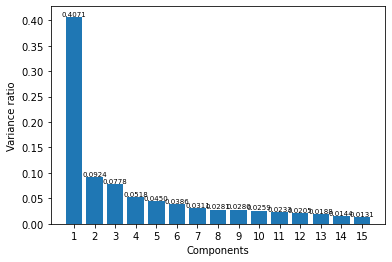

In [28]:
# 训练集数据降维到25维
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape)


#print(X_test_pca.shape)


# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 16))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
#plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
#                                   "16","17","18","19","20","21","22","23","24","25"])
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

In [29]:
#X_norm = StandardScaler().fit_transform(X_test)
#X_test_pca = pca.fit_transform(X_norm)
##X_test_pca = pca.fit_transform(X_test)
#
#print(X_test_pca)
#print(X_test_pca.shape)

In [30]:
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(769, 15)


In [31]:
# 对数据处理
from keras.utils import np_utils

X_train = X_train_pca.reshape((-1,1,15))
Y_train = np_utils.to_categorical(y_train)
X_test = X_test_pca.reshape((-1,1,15))
Y_test = np_utils.to_categorical(y_test)


In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(12450, 1, 15)
(12450, 2)
(769, 1, 15)
(769, 2)


In [33]:
from keras import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,BatchNormalization,Add,concatenate,Flatten
from keras.layers.recurrent import GRU

model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(1,15)))
#model.add(Dropout(0.25))

model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.25))

model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.25))

## model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.25))

model.add(LSTM(units=50))
#model.add(Dropout(0.25))

# model.add(Dense(units=256))
# model.add(Dropout(0.2))
model.add(Dense(units=64))
#model.add(Dropout(0.25))
model.add(Dense(units=16))
#model.add(Dropout(0.25))
model.add(Dense(units=8))
#model.add(Dropout(0.25))

model.add(Dense(units=2,activation="sigmoid"))

In [34]:
# Implement Learning rate decay
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler

checkpoint = ModelCheckpoint("./模型保存/LSTM8在第一位.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta =0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1)
                              #min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

In [35]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history_fit = model.fit(x=X_train, 
                        y=Y_train, 
                        batch_size=8, 
                        epochs=30, 
                        verbose=1, 
                        validation_data=(X_test, Y_test),
                        callbacks=callbacks)

Epoch 1/30
1557/1557 [==============================] - 7s 3ms/step - loss: 0.1206 - accuracy: 0.9521 - val_loss: 0.0739 - val_accuracy: 0.9701

Epoch 00001: val_loss improved from inf to 0.07392, saving model to ./模型保存\LSTM8在第一位.h5
Epoch 2/30
1557/1557 [==============================] - 3s 2ms/step - loss: 0.0674 - accuracy: 0.9741 - val_loss: 0.0366 - val_accuracy: 0.9909

Epoch 00002: val_loss improved from 0.07392 to 0.03663, saving model to ./模型保存\LSTM8在第一位.h5
Epoch 3/30
1557/1557 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9802 - val_loss: 0.0559 - val_accuracy: 0.9818

Epoch 00003: val_loss did not improve from 0.03663
Epoch 4/30
1557/1557 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9827 - val_loss: 0.0266 - val_accuracy: 0.9909

Epoch 00004: val_loss improved from 0.03663 to 0.02659, saving model to ./模型保存\LSTM8在第一位.h5
Epoch 5/30
1557/1557 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.

In [37]:
# 画曲线
def plot_performance(history=None,figure_directory=None,ylim_pad=[0,0]):
    xlabel="Epoch"
    legends=["Training","Validation"]
    
    plt.figure(figsize=(20,5))
    
    y1=history.history["accuracy"]
    y2=history.history["val_accuracy"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[0]
    max_y=max(max(y1),max(y2))+ylim_pad[0]
    
    plt.subplot(121)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Accuracy\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Accuracy",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    
    y1=history.history["loss"]
    y2=history.history["val_loss"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[1]
    max_y=max(max(y1),max(y2))+ylim_pad[1]
    
    plt.subplot(122)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Loss:\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Loss",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    plt.show()


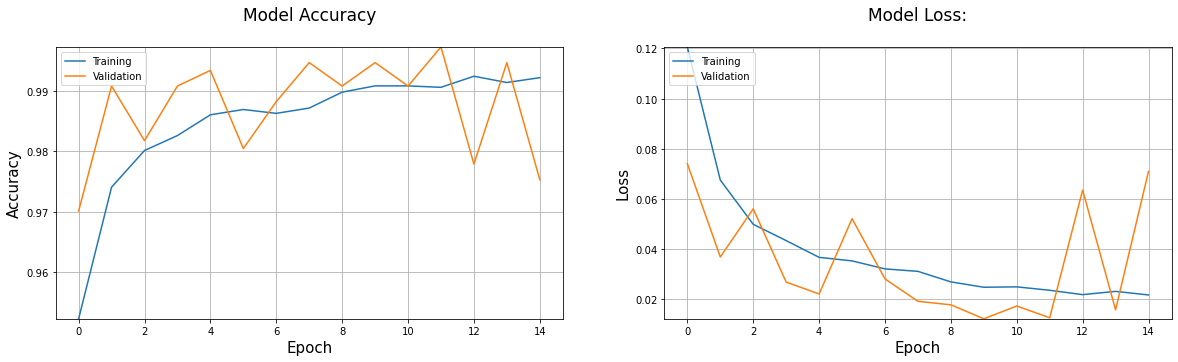

In [38]:
# 可视化
plot_performance(history=history_fit)

In [39]:
##导入保存模型
#from keras import models 
#from keras.models import load_model
#
#
#model = load_model('model.h5')

In [40]:
# 预测
# predict_y = (model.predict(X_test) > 0.5)*1 
# predict_y = np.around(predict_y) # np.around
predict_y = model.predict_classes(X_test)

C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
predict_y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [42]:
print(y_test)

0      1
1      0
2      0
3      0
4      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: Jammer, Length: 769, dtype: int64


In [43]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test,predict_y,digits=4))


              precision    recall  f1-score   support

           0     0.9956    0.9985    0.9971       687
           1     0.9875    0.9634    0.9753        82

    accuracy                         0.9948       769
   macro avg     0.9916    0.9810    0.9862       769
weighted avg     0.9948    0.9948    0.9948       769



In [44]:
from sklearn.metrics import confusion_matrix

a = confusion_matrix(predict_y, y_test)
print(a)

[[686   3]
 [  1  79]]


In [45]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


accuracy_pca = accuracy_score(predict_y, y_test)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(predict_y, y_test)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(predict_y, y_test)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(predict_y, y_test)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

PCA测试集准确率: 0.9948


PCA测试集精确率: 0.9634


PCA测试集召回率: 0.9875


PCA测试集F1值: 0.9753


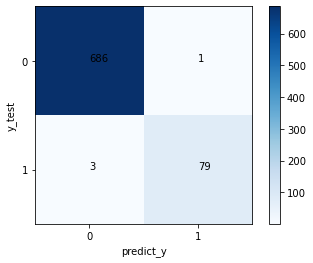

In [46]:
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(predict_y, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('predict_y')
plt.ylabel('y_test')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
 
plt.show()

[0 1]


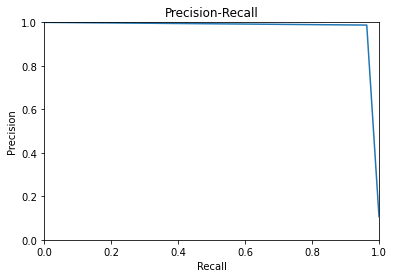

In [47]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, predict_y) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()

In [48]:
corrdf=data.corr()
corrdf

,gpsPdop,gpsNumSv,gpsSec,P_Sol_Status,AvionicsTemp,Lat,Lon,H,tas,Eu[0],...,elevatorCmd,rudderCmd,lonCmd,XaccBias,YaccBias,ZaccBias,AirHeight,WWest,WSouth,Jammer
gpsPdop,1.000000,-0.252108,-0.005957,0.044695,0.178938,0.154260,0.162433,-0.142113,-0.138097,0.158099,...,-0.179080,0.072637,0.018848,0.014143,-0.051304,0.025900,-0.146394,-0.064043,0.045480,0.166531
gpsNumSv,-0.252108,1.000000,-0.475748,-0.257158,-0.759321,-0.948060,-0.949470,0.760147,0.924581,-0.721663,...,0.858034,-0.501177,-0.121032,0.026783,0.253335,-0.341112,0.941807,0.559750,-0.477250,-0.843941
gpsSec,-0.005957,-0.475748,1.000000,-0.281182,0.097321,0.363812,0.319925,-0.240291,-0.390837,0.013179,...,-0.089767,0.147203,0.053654,-0.138248,-0.164869,0.418052,-0.382563,-0.426903,0.082640,0.309391
P_Sol_Status,0.044695,-0.257158,-0.281182,1.000000,0.534702,0.401211,0.404521,-0.269622,-0.320670,0.493182,...,-0.523514,0.225991,0.046711,0.128651,-0.131204,-0.174447,-0.321444,-0.182433,0.341008,0.466739
AvionicsTemp,0.178938,-0.759321,0.097321,0.534702,1.000000,0.802982,0.850150,-0.711342,-0.744025,0.807848,...,-0.902527,0.459399,0.110155,0.047852,-0.294325,0.177199,-0.761117,-0.499604,0.477539,0.729720
Lat,0.154260,-0.948060,0.363812,0.401211,0.802982,1.000000,0.984361,-0.718948,-0.949719,0.795822,...,-0.925890,0.539042,0.118962,-0.013300,-0.252782,0.336647,-0.966122,-0.556518,0.508468,0.854681
Lon,0.162433,-0.949470,0.319925,0.404521,0.850150,0.984361,1.000000,-0.811723,-0.951681,0.825640,...,-0.953948,0.550539,0.114636,-0.009823,-0.256420,0.333912,-0.971124,-0.551195,0.524993,0.856507
H,-0.142113,0.760147,-0.240291,-0.269622,-0.711342,-0.718948,-0.811723,1.000000,0.783568,-0.681613,...,0.759189,-0.490331,-0.012893,0.003541,0.222171,-0.271658,0.801977,0.418700,-0.454465,-0.698888
tas,-0.138097,0.924581,-0.390837,-0.320670,-0.744025,-0.949719,-0.951681,0.783568,1.000000,-0.770871,...,0.864982,-0.579024,0.033706,0.034290,0.268345,-0.342458,0.982788,0.546011,-0.509956,-0.816501
Eu[0],0.158099,-0.721663,0.013179,0.493182,0.807848,0.795822,0.825640,-0.681613,-0.770871,1.000000,...,-0.837780,0.756752,0.034311,0.018061,-0.265589,0.155610,-0.786554,-0.376849,0.460546,0.698356


In [49]:
corrdf['Jammer'].sort_values(ascending = False)

Jammer            1.000000
Lon               0.856507
Lat               0.854681
AvionicsTemp      0.729720
Eu[0]             0.698356
WSouth            0.552770
YMagFiled         0.518254
rudderCmd         0.469238
P_Sol_Status      0.466739
acc[2]            0.429350
ZMagFiled         0.419822
gpsSec            0.309391
InertVNED[2]      0.244353
ZaccBias          0.212714
gpsPdop           0.166531
XMagFiled         0.156675
pqr[2]            0.127575
InertVNED[0]      0.115683
lonCmd            0.098912
XaccBias          0.096136
Eu[2]            -0.028562
InertVNED[1]     -0.062090
Compass          -0.093162
pqr[0]           -0.253395
YaccBias         -0.279433
pqr[1]           -0.350286
acc[1]           -0.466351
WWest            -0.531931
H                -0.698888
aileronLeftCmd   -0.716843
acc[0]           -0.807084
elevatorCmd      -0.809517
tas              -0.816501
DynPressure      -0.817846
Eu[1]            -0.822805
AirHeight        -0.843428
gpsNumSv         -0.843941
N

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             13200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1